## Example: Prediction

In [25]:
# imports!
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings; warnings.simplefilter('ignore') # just for the slides!
import numpy as np
from datascience import *

### Sir Francis Galton

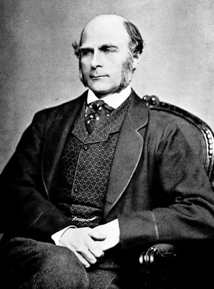


### Sir Francis Galton

* 1822 - 1911 (knighted in 1909)
* A pioneer in making predictions
* Particular interest in heredity
* Charles Darwin's half-cousin




### Can we predict the height of a child, given the height of their parents?
* read in heights from `galton.csv`
* relabel columns for convenience

In [20]:
galton = (
    Table
    .read_table('galton.csv')
    .relabeled('midparentHeight', 'midparent')
    .relabeled('childHeight', 'child')
)

heights = galton.select('midparent', 'mother', 'father', 'child')

In [21]:
heights

midparent,mother,father,child
75.43,67,78.5,73.2
75.43,67,78.5,69.2
75.43,67,78.5,69
75.43,67,78.5,69
73.66,66.5,75.5,73.5
73.66,66.5,75.5,72.5
73.66,66.5,75.5,65.5
73.66,66.5,75.5,65.5
72.06,64,75,71
72.06,64,75,68


## Can we predict the height of a child, given the height of their parents?

### scatterplot of child vs. mother/father
* Childrens's height influenced by a combination of the height of the mother and father

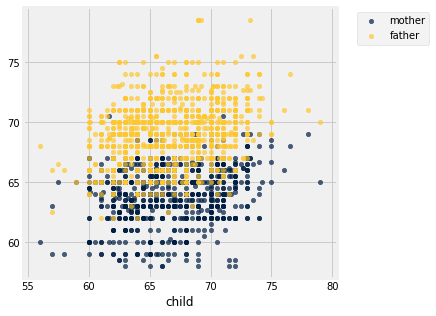

In [22]:
heights.select('child', 'mother', 'father').scatter('child')

### scatterplot of midparent vs child height
* Galton calculated the variable `midparent` that is a weighted average of the parents' height

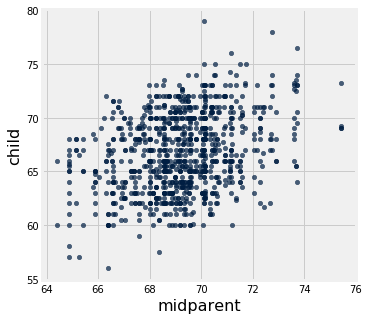

In [23]:
heights.scatter('midparent', 'child')

### Can we predict the height of a child, given the height of their parents?
* Use the current dataset to inform a prediction of new, unseen parents/children.

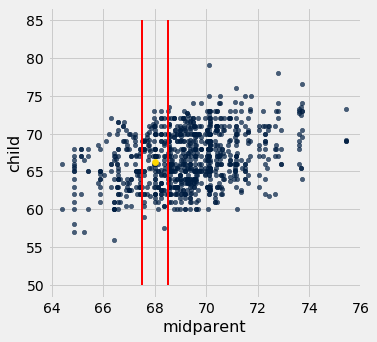

In [26]:
heights.scatter('midparent', 'child')
_ = plt.plot([67.5, 67.5], [50, 85], color='red', lw=2)
_ = plt.plot([68.5, 68.5], [50, 85], color='red', lw=2)
_ = plt.scatter(68, 66.24, color='gold', s=40)

### Can we predict the height of a child, given the height of their parents?

* Given the midparent height, restrict to nearby examples in the dataset (within 0.5 in).
* Take the average child height within these nearby examples.
* This average is our guess!

In [27]:
def predict_child(mp):
    '''returns a childs predicted height, given the midparent height, mp.'''
    nearby = heights.where('midparent', are.between_or_equal_to(mp - 0.5, mp + 0.5))
    return nearby.column('child').mean()

predict_child(68)

66.24045801526718

### Can we predict the height of a child, given the height of their parents?
* Apply our function to all our examples
* Create a new column called `prediction` and plot the output 

In [28]:
heights = heights.with_column('prediction', heights.apply(predict_child, 'midparent'))
heights

midparent,mother,father,child,prediction
75.43,67,78.5,73.2,70.1
75.43,67,78.5,69.2,70.1
75.43,67,78.5,69,70.1
75.43,67,78.5,69,70.1
73.66,66.5,75.5,73.5,70.4158
73.66,66.5,75.5,72.5,70.4158
73.66,66.5,75.5,65.5,70.4158
73.66,66.5,75.5,65.5,70.4158
72.06,64,75,71,68.5025
72.06,64,75,68,68.5025


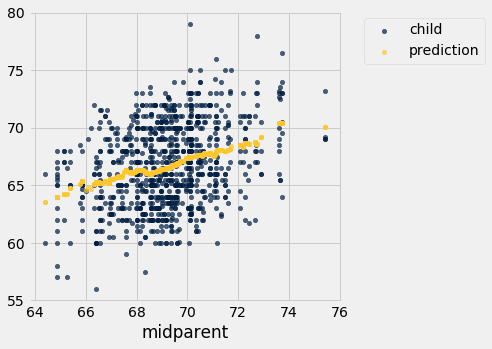

In [29]:
heights.select('midparent', 'child', 'prediction').scatter('midparent')

# `apply` using Multiple Arguments

### `apply` using Multiple Arguments

The apply method creates an array by calling a function on every element in one or more input columns.
* First argument: Function to apply
* Other argument(s): The input column(s)
* If no columns are supplied, then applies to whole row

```
table_name.apply(function_name, 'column_label1',...,'column_labelN')
```

### Recreate midparent using a function
* Weighted average of father (1.07) and mother (1.0)
* Compare runtime of applying a customer function vs. numpy column operations

In [30]:
def calc_mp(mother, father):
    return (mother + 1.07 * father) / 2

In [31]:
% timeit heights.apply(calc_mp, 'mother', 'father')

950 µs ± 51.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [32]:
% timeit (heights.column('mother') + heights.column('father') * 1.07)/2

13 µs ± 998 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Row objects
* `.row(index)` accesses a row from the table.
* Access an element of a row using `.item(col_name)`

In [33]:
row = heights.row(0)
row

Row(midparent=75.43, mother=67.0, father=78.5, child=73.2, prediction=70.1)

In [34]:
row.item('midparent')

75.43

### Apply a function to row objects
* `.apply(func)` without specifying columns, applies function to entire row.
* Define a function that calculates the prediction errors.

In [36]:
def calc_errors(row):
    return abs(row.item('prediction') - row.item('child'))

heights = heights.with_column(
    'errors',
    heights.apply(calc_errors)
)

heights

midparent,mother,father,child,prediction,errors
75.43,67,78.5,73.2,70.1,3.1
75.43,67,78.5,69.2,70.1,0.9
75.43,67,78.5,69,70.1,1.1
75.43,67,78.5,69,70.1,1.1
73.66,66.5,75.5,73.5,70.4158,3.08421
73.66,66.5,75.5,72.5,70.4158,2.08421
73.66,66.5,75.5,65.5,70.4158,4.91579
73.66,66.5,75.5,65.5,70.4158,4.91579
72.06,64,75,71,68.5025,2.4975
72.06,64,75,68,68.5025,0.5025
